<a href="https://colab.research.google.com/github/olive-su/AI_codepresso/blob/master/perceptron_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
# 파라미터 값 설정
input_dim = 2 # 축 : 2
hidden_units = 1 # 퍼셉트론을 하나만 만듦
learning_rate = 0.01

In [3]:
# 가중치(input 특성 : 2/ 퍼셉트론 : 1)
w= tf.Variable(tf.random.uniform(shape=(input_dim, hidden_units))) # 랜덤값 할당

# 편향(퍼셉트론 : 1)
b = tf.Variable(tf.zeros(shape=(hidden_units,))) # zeros : 모두 0으로 채우는 메서드

In [4]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.8147211],
       [0.9899014]], dtype=float32)>

In [5]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

In [6]:
# 퍼셉트론의 수학 모델 f(x*w+b)
def predict(input):
  x = tf.matmul(input, w) + b # matmul 함수 : 행렬의 곱 구함
  x = tf.maximum(0, x) # activation 함수로 Relu 함수 사용
  return x

In [7]:
# loss값으로 mse를 구현하는 함수 생성
def mse_loss(labels, predictions):
  loss = tf.reduce_mean(tf.square(labels - predictions)) # '정답 - 모델의 예측값' 제곱 후 평균 반환
  return loss

In [8]:
# train
def train(inputs, labels):
  with tf.GradientTape() as tape:
    # 퍼셉트론 모델의 예측값을 계산
    predictions = predict(inputs)
    # 모델의 예측값과 정답간의 에러를 loss를 이용해 계산
    loss = mse_loss(labels, predictions)
    # 모델의 변수(w, b) loss 값에 미치는 영향도를 미분(오차역전파)을 통해 계산
    # weight가 loss에 미치는 영향도의 미분값, bias가 loss에 미치는 영향도의 미분값 구함
    gradient_lw, gradient_lb = tape.gradient(loss, [w, b]) # 오차역전파로 값 도출
  w.assign(w - learning_rate * gradient_lw) # 위에서 수행한 연산값을 weight에 업데이트
  b.assign(b - learning_rate * gradient_lb) # 위에서 수행한 연산값을 bias에 업데이트
  return loss


* 퍼셉트론 모델 학습을 위한 AND Gate 데이터 생성

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]], dtype=np.float32)

In [11]:
labels = np.array([0,0,0,1], dtype=np.float32)

In [12]:
inputs.shape

(4, 2)

In [13]:
labels.shape

(4,)

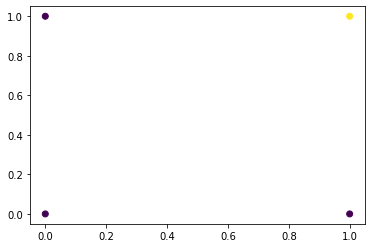

In [14]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=labels[:]) # x1 데이터, x2 데이터 적용

In [15]:
for epoch in range(100): # 학습을 진행할 때마다 epoch 값이 1씩 증가
  for x, y in zip(inputs, labels):
    loss = train([x], [y]) # 보통 하나의 데이터로 학습을 진행하는 경우는 없어서
    # 에러로 판단하므로 명시적으로 하나의 데이터라고 []를 이용해 표현함
  print("Epoch {} : loss={}".format(epoch+1, float(loss)))

Epoch 1 : loss=0.5376255512237549
Epoch 2 : loss=0.38988134264945984
Epoch 3 : loss=0.27871766686439514
Epoch 4 : loss=0.19574737548828125
Epoch 5 : loss=0.13443772494792938
Epoch 6 : loss=0.08970781415700912
Epoch 7 : loss=0.057612136006355286
Epoch 8 : loss=0.03509347140789032
Epoch 9 : loss=0.019787495955824852
Epoch 10 : loss=0.009870843961834908
Epoch 11 : loss=0.003941495902836323
Epoch 12 : loss=0.0009254238684661686
Epoch 13 : loss=3.223073008484789e-06
Epoch 14 : loss=0.0005529994377866387
Epoch 15 : loss=0.0021056162659078836
Epoch 16 : loss=0.004309889394789934
Epoch 17 : loss=0.006905335932970047
Epoch 18 : loss=0.009701031260192394
Epoch 19 : loss=0.012559222988784313
Epoch 20 : loss=0.015382522717118263
Epoch 21 : loss=0.01810409687459469
Epoch 22 : loss=0.02067985199391842
Epoch 23 : loss=0.023082861676812172
Epoch 24 : loss=0.025298718363046646
Epoch 25 : loss=0.027321945875883102
Epoch 26 : loss=0.029153555631637573
Epoch 27 : loss=0.030799049884080887
Epoch 28 : loss=

In [16]:
predictions = predict(inputs)

In [17]:
predictions

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.        ],
       [0.13108599],
       [0.11110067],
       [0.8405812 ]], dtype=float32)>

* 학습이 제대로 구현되었는지 그래프로 출력함

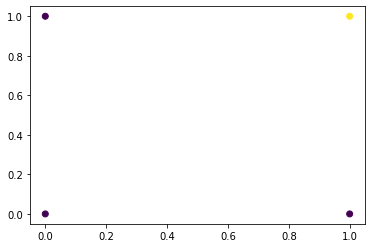

In [18]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:]>0.5)

* 테스트 데이터셋 생성

In [24]:
test_inputs = np.random.uniform(0, 1, (5000, 2)).astype(np.float32) # uniform : 랜덤함수 모듈 중 동일한 확률 분포의 값을 예측한다.

In [20]:
test_inputs

array([[0.9655776 , 0.15440916],
       [0.98921824, 0.7924623 ],
       [0.7062553 , 0.5981796 ],
       ...,
       [0.2888947 , 0.32789078],
       [0.56409484, 0.4223522 ],
       [0.50041056, 0.6789125 ]], dtype=float32)

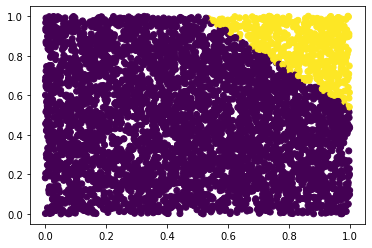

In [23]:
predictions = predict(test_inputs)
plt.scatter(test_inputs[:, 0], test_inputs[:, 1], c=predictions[:]>0.5)

In [26]:
w # 최적의 weight

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.7094952],
       [0.7294805]], dtype=float32)>

In [27]:
b # 최적의 bias

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.5983945], dtype=float32)>